# Contributors to California Civic Data Coalition repositories

By Ben Welsh

This analysis is drawn from the open-source list of contributors compiled by GitHub. It was last harvested on Dec. 18, 2016, [using a Python script that interacts with GitHub's API](https://github.com/california-civic-data-coalition/django-calaccess-raw-data/blob/master/example/network-analysis/contributors.csv).  

In [1183]:
import pandas as pd
import numpy as np

In [1184]:
pd.options.display.max_rows = 5000

In [1185]:
%matplotlib inline

## Load in the data

In [1186]:
table = pd.read_csv("./input/contributors.csv")

In [1187]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
repo             183 non-null object
login            183 non-null object
name             141 non-null object
email            93 non-null object
company          93 non-null object
location         118 non-null object
bio              27 non-null object
avatar_url       183 non-null object
contributions    183 non-null int64
dtypes: int64(1), object(8)
memory usage: 12.9+ KB


### Clean up strings

In [1188]:
table.replace(np.nan, "", inplace=True)

In [1189]:
table.login = table.login.map(str.strip).str.lower()
table.company = table.company.map(str.strip)
table.location = table.location.map(str.strip)
table.avatar_url = table.avatar_url.map(str.strip)

### Merge in corrections

In [1190]:
corrections = pd.read_csv("./input/contributors-corrections.csv")

In [1191]:
table = table.merge(corrections, on="login", how="left")

In [1192]:
table.name = table.corrected_name.fillna(table.name)
table.company = table.corrected_company.fillna(table.company)
table.location = table.corrected_location.fillna(table.location)

In [1193]:
table.drop('corrected_name', axis=1, inplace=True)
table.drop('corrected_company', axis=1, inplace=True)
table.drop('corrected_location', axis=1, inplace=True)

### Merge some common variations

In [1194]:
table.loc[table.location == 'Los Angeles', 'location'] = 'Los Angeles, CA'
table.loc[table.location == 'Washington D.C.', 'location'] = 'Washington, DC'
table.loc[table.location == 'Washington, D.C.', 'location'] = 'Washington, DC'
table.loc[table.location == 'Chicago', 'location'] = 'Chicago, IL'

In [1195]:
table.company = table.company.str.replace("The ", "")
table.loc[table.company == 'Sunnmorsposten', 'company'] = 'Sunnmørsposten'
table.loc[table.company == 'Wall Street Journal.', 'company'] = 'Wall Street Journal'
table.loc[table.company == 'Northwestern University Knight Lab', 'company'] = 'Northwestern'
table.loc[table.company == 'Investigative News Network', 'company'] = 'Institute for Nonprofit News'
table.loc[table.company == 'Stanford', 'company'] = 'Stanford University'
table.loc[table.company == 'Missouri School of Journalism', 'company'] = 'University of Missouri'
table.loc[table.company == 'University of Iowa School of Journalism', 'company'] = 'University of Iowa'
table.loc[table.company == 'Knight-Mozilla fellow 2015', 'company'] = 'Mozilla OpenNews'
table.loc[table.company == 'Knight-Mozilla Fellow', 'company'] = 'Mozilla OpenNews'

### Identify gaps

#### People missing a name 

In [1196]:
len(table[table.name == ''])

14

In [1197]:
sorted(table[table.name == ''].login.unique())

['cecht',
 'fagerlise',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'regirob831',
 'samlo78',
 'soorinkimmm',
 'yujiap']

#### People missing a company

In [1198]:
len(table[table.company == ''])

16

In [1199]:
sorted(table[table.company == ''].login.unique())

['cecht',
 'jayelle-o',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'regirob831',
 'rkiddy',
 'samlo78',
 'soorinkimmm',
 'tocateunvals',
 'vromney',
 'yujiap']

#### People missing a location 

In [1200]:
len(table[table.location == ''])

19

In [1201]:
sorted(table[table.location == ''].login.unique())

['benlk',
 'cecht',
 'fagerlise',
 'jayelle-o',
 'jlagetz',
 'karkinosw',
 'katbuchholz',
 'malon',
 'mb10',
 'mjlorda',
 'mmhirsch',
 'pumadegit',
 'regirob831',
 'samlo78',
 'soorinkimmm',
 'taraadiseshan',
 'vromney',
 'yujiap']

#### People missing an email 

In [1202]:
len(table[table.email == ''])

90

In [1223]:
sorted(table[table.email == ''].login.unique())

['absolutevan',
 'amzam',
 'anabranch',
 'annkiha',
 'aquintero4354',
 'armendariz',
 'bdin',
 'brianmcgill',
 'burtherman',
 'carloslemos',
 'caseymm',
 'caseypt',
 'cecht',
 'chagan',
 'chrisalcantara',
 'danhillreports',
 'danmit',
 'dcloud',
 'desireedesario',
 'drtortoise',
 'duner',
 'ebonymarieb',
 'elainewong',
 'enactdev',
 'fagerlise',
 'fcoel',
 'jayelle-o',
 'jennbrandel',
 'jernsthausen',
 'jlagetz',
 'joannalin',
 'joshuarrrr',
 'juliewestfall',
 'karissa',
 'karkinosw',
 'katbuchholz',
 'kevinbogardus',
 'kissane',
 'latams',
 'lauragomezrod',
 'lehrennyt',
 'lengsj',
 'livlab',
 'macdiva',
 'malon',
 'maloym',
 'mattdatajourno',
 'mb10',
 'melissaleu',
 'merbroussard',
 'miguelpaz',
 'mijebner',
 'mikereicher',
 'mjenner',
 'mjlorda',
 'mmhirsch',
 'momiperalta',
 'nicolewest',
 'nikkiusher',
 'pumadegit',
 'qstin',
 'regirob831',
 'sahilchinoy',
 'samlo78',
 'saraschnadt',
 'soorinkimmm',
 'sourcedouglas',
 'taraadiseshan',
 'tbone',
 'tchristianmiller',
 'tocateunvals

## Analysis

### Totals 

In [1203]:
unique_contributors = table.groupby("login", as_index=False).contributions.sum()

In [1204]:
unique_contributors.contributions.sum()

5416

In [1205]:
unique_contributors.describe()

,contributions
count,144.000000
mean,37.611111
std,268.814078
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,2932.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dddad2390>]], dtype=object)

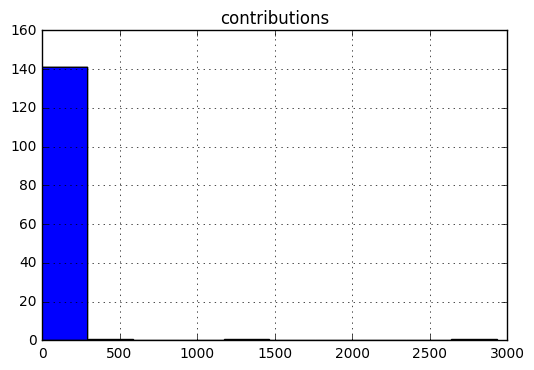

In [1206]:
unique_contributors.hist()

### Contributions rankings

In [1207]:
def rank_by_contributions(table, field):
    grouped = table.groupby(field, as_index=False)
    summed = grouped.contributions.sum()
    return summed.sort_values("contributions", ascending=False)

In [1208]:
rank_by_contributions(table, 'repo').head(20)

,repo,contributions
8,django-calaccess-raw-data,2391
0,california-civic-data-coalition.github.io,806
1,django-calaccess-campaign-browser,731
4,django-calaccess-downloads-website,718
6,django-calaccess-processed-data,288
9,django-calaccess-technical-documentation,229
10,django-postgres-copy,101
11,python-calaccess-notebooks,62
2,django-calaccess-cookbook,30
3,django-calaccess-docker,29


In [1209]:
rank_by_contributions(table, 'login').head(20)

,login,contributions
114,palewire,2932
50,gordonje,1329
0,aboutaaron,379
124,sahilchinoy,126
13,armendariz,69
7,anabranch,47
11,anthonyjpesce,40
21,caseymm,33
60,jjelosua,29
136,tocateunvals,25


In [1210]:
rank_by_contributions(table, 'company').head(20)

,company,contributions
43,Los Angeles Times,3017
15,California Civic Data Coalition,1329
79,Washington Post,387
70,UC Berkeley,126
50,New York Times,73
0,,58
45,Mozilla OpenNews,49
24,Databricks,47
77,Vox Media,33
47,NPR,29


In [1211]:
rank_by_contributions(table, 'location').head(20)

,location,contributions
28,"Los Angeles, CA",3021
15,"Columbia, MO",1330
57,"Washington, DC",423
35,"New York, NY",157
5,"Berkeley, CA",127
12,California,47
0,,43
14,"Chicago, IL",31
2,Argentina,25
55,United States,22


### In coalition vs. out of coalition

In [1212]:
login_list = [
    'palewire',
    'gordonje',
    'sahilchinoy',
    'aboutaaron',
    'armendariz',
    'cephillips'
]
table['in_coalition'] = table.login.isin(login_list)

In [1213]:
table.groupby('in_coalition').size()

in_coalition
False    148
True      35
dtype: int64

In [1214]:
table.groupby('in_coalition').size() / table.groupby('in_coalition').size().sum()

in_coalition
False    0.808743
True     0.191257
dtype: float64

In [1215]:
table.groupby('in_coalition').contributions.sum()

in_coalition
False     571
True     4845
Name: contributions, dtype: int64

In [1216]:
table.groupby('in_coalition').contributions.sum() / table.groupby('in_coalition').contributions.sum().sum()

in_coalition
False    0.105428
True     0.894572
Name: contributions, dtype: float64

## Unique contributors

In [1217]:
table.groupby("repo", as_index=False).size().reset_index().sort_values(0, ascending=False)

,repo,0
8,django-calaccess-raw-data,132
1,django-calaccess-campaign-browser,18
0,california-civic-data-coalition.github.io,7
4,django-calaccess-downloads-website,7
9,django-calaccess-technical-documentation,5
5,django-calaccess-lobbying-browser,3
6,django-calaccess-processed-data,3
10,django-postgres-copy,3
11,python-calaccess-notebooks,2
2,django-calaccess-cookbook,1


In [1218]:
unique_contributors = table.groupby(["login", "company", "location", "avatar_url"]).contributions.sum().reset_index()

In [1219]:
unique_contributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
login            144 non-null object
company          144 non-null object
location         144 non-null object
avatar_url       144 non-null object
contributions    144 non-null int64
dtypes: int64(1), object(4)
memory usage: 5.7+ KB


In [1220]:
unique_contributors.sort_values("login").head(25)

,login,company,location,avatar_url,contributions
0,aboutaaron,Washington Post,"Washington, DC",https://avatars.githubusercontent.com/u/856628...,379
1,absolutevan,Arizona Center for Investigative Reporting,"Phoenix, AZ",https://avatars.githubusercontent.com/u/165300...,1
2,achavez,Dallas Morning News,"Dallas, TX",https://avatars.githubusercontent.com/u/682828...,1
3,acoreynews,Arizona Republic,"Las Vegas, NV",https://avatars.githubusercontent.com/u/562616...,1
4,amandabee,BuzzFeed,"San Francisco, CA",https://avatars.githubusercontent.com/u/150791...,7
5,amzam,Texas Tribune,"Austin, TX",https://avatars.githubusercontent.com/u/579612...,2
6,anabecker,Wall Street Journal,"New York, NY",https://avatars.githubusercontent.com/u/265281...,1
7,anabranch,Databricks,California,https://avatars.githubusercontent.com/u/164250...,47
8,anniedaniel,Texas Tribune,"Austin, TX",https://avatars.githubusercontent.com/u/512549...,1
9,annkiha,Fremover,"Narvik, Norway",https://avatars.githubusercontent.com/u/113393...,1


In [1221]:
unique_contributors.to_csv("./output/unique-contributors.csv")